In [ ]:
!pip install tflite-model-maker

     |████████████████████████████████| 616 kB 8.5 MB/s 
     |████████████████████████████████| 120 kB 57.0 MB/s 
     |████████████████████████████████| 1.2 MB 30.0 MB/s 
     |████████████████████████████████| 87 kB 4.9 MB/s 
     |████████████████████████████████| 1.1 MB 50.3 MB/s 
     |████████████████████████████████| 840 kB 52.3 MB/s 
     |████████████████████████████████| 77 kB 5.5 MB/s 
     |████████████████████████████████| 596 kB 50.0 MB/s 
     |████████████████████████████████| 1.1 MB 48.4 MB/s 
     |████████████████████████████████| 3.4 MB 45.2 MB/s 
     |████████████████████████████████| 6.4 MB 26.5 MB/s 
     |████████████████████████████████| 213 kB 55.1 MB/s 
     |████████████████████████████████| 25.3 MB 1.6 MB/s 
     |████████████████████████████████| 47.6 MB 70 kB/s 
     |████████████████████████████████| 352 kB 49.4 MB/s 
     |████████████████████████████████| 99 kB 9.7 MB/s 
     |████████████████████████████████| 208 kB 45.2 MB/s 
  Created wheel for fi

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
import os
 
import seaborn as sn
from sklearn.metrics import confusion_matrix
 
import tensorflow as tf
assert tf.__version__.startswith('2')
 
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

In [ ]:
!wget --no-check-certificate -r \
      "https://drive.google.com/u/0/uc?id=1J45-wxBwrBCEHsJzsmuxCnzHVvoDjlr2&export=download" \
      -O asl_dataset.zip

will be placed in the single file you specified.

--2021-12-17 08:08:51--  https://drive.google.com/u/0/uc?id=1J45-wxBwrBCEHsJzsmuxCnzHVvoDjlr2&export=download
Resolving drive.google.com (drive.google.com)... 74.125.142.102, 74.125.142.113, 74.125.142.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f73g4skp8r4is6mdlvr1gglv3u2sq31m/1639728525000/10618232739771296396/*/1J45-wxBwrBCEHsJzsmuxCnzHVvoDjlr2?e=download [following]
--2021-12-17 08:09:00--  https://doc-0c-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f73g4skp8r4is6mdlvr1gglv3u2sq31m/1639728525000/10618232739771296396/*/1J45-wxBwrBCEHsJzsmuxCnzHVvoDjlr2?e=download
Resolving doc-0c-8o-docs.googleusercontent.com (doc-0c-8o-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Conn

In [ ]:
ds_path = "Datasets"

In [ ]:
import os, zipfile
 
 
zip_archive = "asl_dataset.zip"
zip_ref = zipfile.ZipFile(zip_archive, "r")
zip_ref.extractall(ds_path)
zip_ref.close()

In [ ]:
datasets = DataLoader.from_folder(ds_path)

INFO:tensorflow:Load image with size: 1815, num_label: 26, labels: a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z.


In [ ]:
training, rest = datasets.split(0.8) # 80% for training
validation, testing = rest.split(0.5) # 10% for testing, 10% for validation

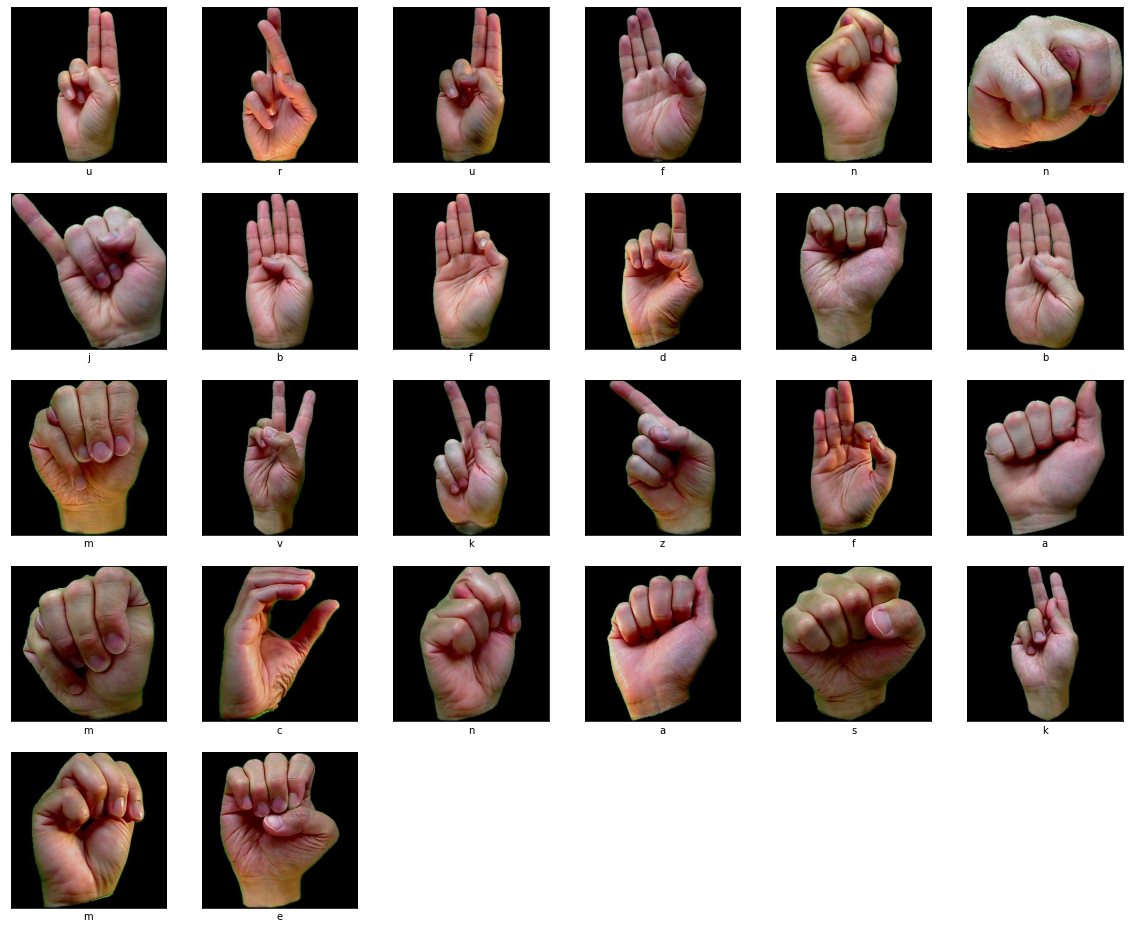

In [ ]:
plt.figure(figsize=(20, 20))
for i, (image, label) in enumerate(
    datasets.gen_dataset().unbatch().take(26)):
  plt.subplot(6, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(datasets.index_to_label[label.numpy()])
 
plt.show()

In [ ]:
efficientnet_model = model_spec.get("efficientnet_lite1")

In [ ]:
model = image_classifier.create(training,
                                epochs=150,
                                validation_data=validation,
                                use_augmentation=True,
                                shuffle=True,
                                model_spec=efficientnet_model)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             4189344   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 26)                33306     
                                                                 
Total params: 4,222,650
Trainable params: 33,306
Non-trainable params: 4,189,344
_________________________________________________________________
None
INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


Epoch 1/150


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


45/45 [==============================] - 80s 2s/step - loss: 3.2044 - accuracy: 0.0903 - val_loss: 2.8112 - val_accuracy: 0.2928
Epoch 2/150
45/45 [==============================] - 76s 2s/step - loss: 2.8473 - accuracy: 0.2396 - val_loss: 2.4501 - val_accuracy: 0.3978
Epoch 3/150
45/45 [==============================] - 76s 2s/step - loss: 2.5922 - accuracy: 0.3229 - val_loss: 2.2251 - val_accuracy: 0.4972
Epoch 4/150
45/45 [==============================] - 77s 2s/step - loss: 2.4002 - accuracy: 0.4250 - val_loss: 2.0219 - val_accuracy: 0.5691
Epoch 5/150
45/45 [==============================] - 76s 2s/step - loss: 2.2825 - accuracy: 0.4535 - val_loss: 1.8792 - val_accuracy: 0.6796
Epoch 6/150
45/45 [==============================] - 76s 2s/step - loss: 2.2072 - accuracy: 0.4868 - val_loss: 1.7616 - val_accuracy: 0.6630
Epoch 7/150
45/45 [==============================] - 76s 2s/step - loss: 2.1119 - accuracy: 0.5208 - val_loss: 1.6648 - val_accuracy: 0.7459
Epoch 8/150
45/45 [======

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             4189344   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 26)                33306     
                                                                 
Total params: 4,222,650
Trainable params: 33,306
Non-trainable params: 4,189,344
_________________________________________________________________


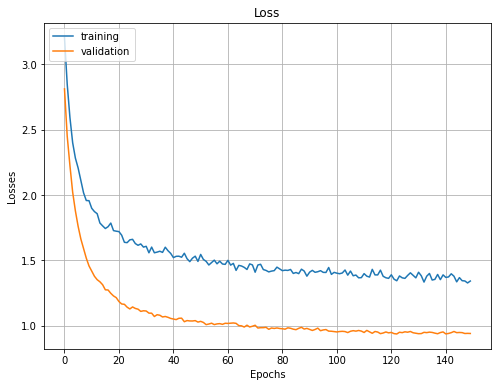

In [ ]:
%matplotlib inline
 
#Loss graph
plt.figure(figsize=(8, 6))
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Loss")
plt.ylabel("Losses")
plt.xlabel("Epochs")
plt.grid(True)
plt.legend(["training", "validation"], loc="upper left")
plt.show()

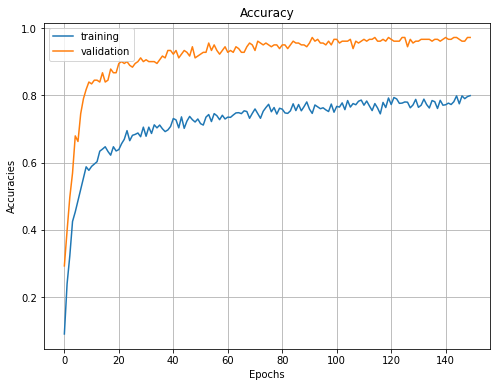

In [ ]:
#Accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Accuracy")
plt.ylabel("Accuracies")
plt.xlabel("Epochs")
plt.grid(True)
plt.legend(["training", "validation"], loc="upper left")
plt.show()

In [ ]:
model.evaluate(testing)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


6/6 [==============================] - 10s 1s/step - loss: 0.9386 - accuracy: 0.9396


[0.9386310577392578, 0.9395604133605957]

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


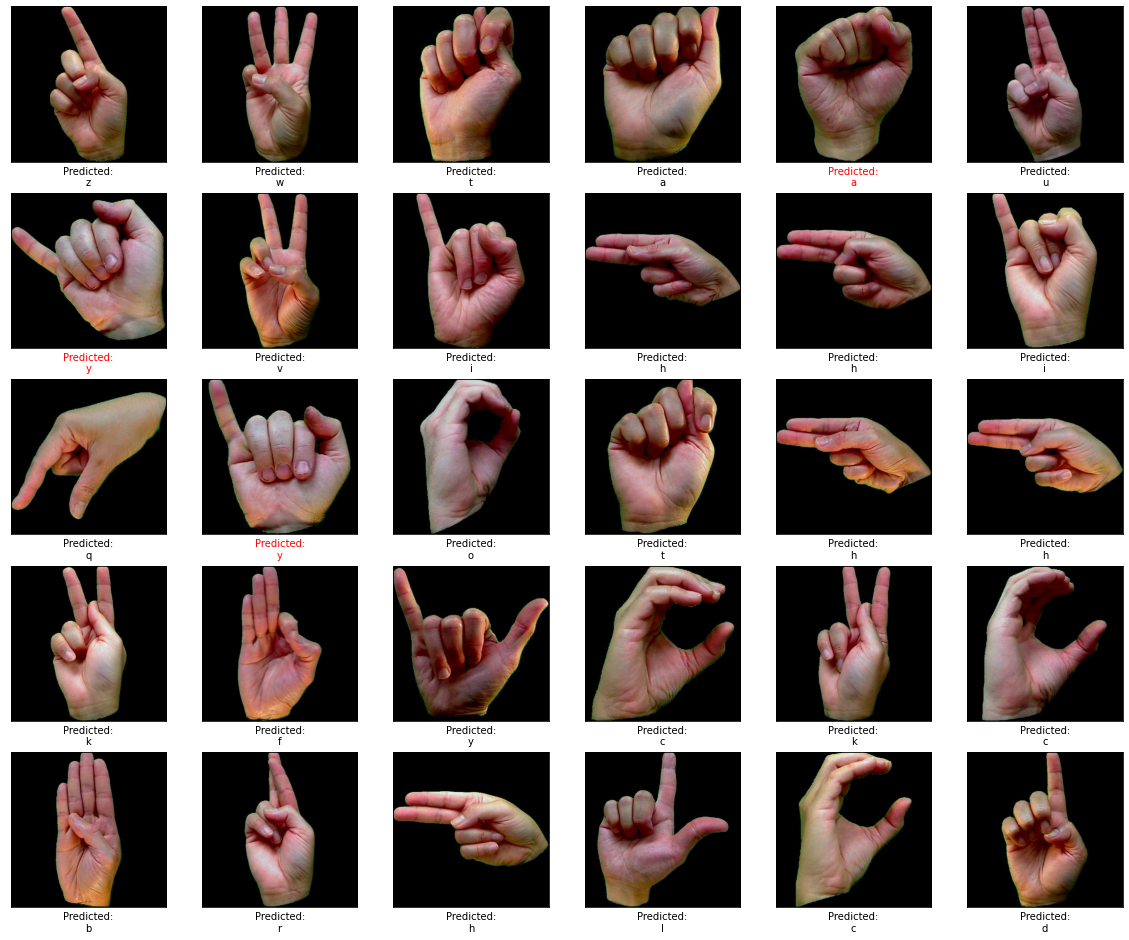

In [ ]:
def get_label_color(predict_label, actual_label):
  if predict_label == actual_label:
    return "black"
  else:
    return "red"
 
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(testing)
for i, (image, label) in enumerate(
    testing.gen_dataset().unbatch().take(30)):
  ax = plt.subplot(6, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap="Greys")
 
  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          testing.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel("Predicted:\n{}".format(predict_label))
 
plt.show()

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


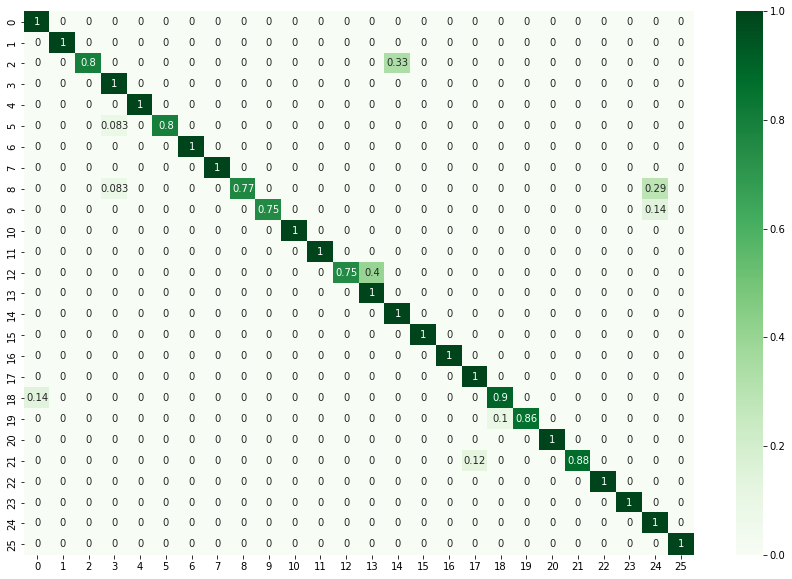

In [ ]:
labels = os.listdir(os.path.join(ds_path))
labels.sort()
 
label_dicts = {}
 
for i in range(len(labels)):
  label_dicts[labels[i]] = i
 
predicts = model.predict_top_k(testing)
predict_labels = [ label_dicts[predicts[i][0][0]]
                  for i, (image, label) in enumerate(testing.gen_dataset().unbatch()) ]
 
actual_labels = [ label.numpy()
                  for i, (image, label) in enumerate(testing.gen_dataset().unbatch()) ]
 
plt.figure(figsize=(15, 10))
signhand_cm = confusion_matrix(y_true=actual_labels, y_pred=predict_labels)
signhand_cm = signhand_cm / signhand_cm.sum(axis=1) # To display conf. matrix in percetage %
 
sn.heatmap(signhand_cm, annot=True, cmap="Greens")

In [ ]:
model.export(export_dir=".")

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Assets written to: /tmp/tmpz_4i6ezl/assets


INFO:tensorflow:Assets written to: /tmp/tmpz_4i6ezl/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp613x5bfo/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp613x5bfo/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [ ]:
model.export(export_dir=".", export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./labels.txt


INFO:tensorflow:Saving labels in ./labels.txt


In [ ]:
model.evaluate_tflite("model.tflite", testing)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


{'accuracy': 0.945054945054945}

In [ ]:
quantizer = QuantizationConfig.for_int8(representative_data=testing)

model.export(export_dir=".", quantization_config=quantizer)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Assets written to: /tmp/tmppg8z2fel/assets


INFO:tensorflow:Assets written to: /tmp/tmppg8z2fel/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpo6a23bql/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpo6a23bql/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [ ]:
model.evaluate_tflite("model.tflite", testing)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


{'accuracy': 0.9560439560439561}

In [ ]:
from google.colab import files
files.download('model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>